<a href="https://colab.research.google.com/github/maha-alarifi/Aligatou_AI/blob/master/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to Algatou_AI's Image Segmentation Impelmentation 
In this project we used the K-Mean model to segment the images.

In [0]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# from skimage.color import rgb2gray

# import cv2
# from scipy import ndimage
%matplotlib inline


In [0]:
# Please note that this folder is in my drive you need to put your own dataset folder in order to run this cell
directory = os.fsencode("/content/drive/My Drive/AiDataset_February_21/OD/*.png")

In [43]:
links = glob.glob(directory)
# imgs = []
c = []
len(links)

121

##Segmentation Recursive Method
This recursive method takes two arraies, one with all the images and the other one is empty.  with each recursive call, the frist array is cut by one element. Until the last elemnt, the recursive call returns an array with segmented images.

In [0]:
def recursive_segmetation (a, b): #(a)is the array with the paths to the images (b)is the empty array to store the segmented images
  #process the image a[0]
  x = plt.imread(a[0].decode()) #read the image
  x_n = x.reshape(x.shape[0]*x.shape[1], x.shape[2]) #flatten the image

  # for i in range(2,4): #Getting two styles of segmentation for the image a[0],  2 clusters and 3custers
  print('fitting the k-mean '+ str(i))
  kmeans = KMeans(n_clusters=2, random_state=0).fit(x_n)
  pic2show = kmeans.cluster_centers_[kmeans.labels_]
  cluster_pic = pic2show.reshape(x.shape[0], x.shape[1], x.shape[2])
  b.append(cluster_pic)

  if len(a) == 1: #if there is only one image in the array, return b
    print('break statment')
    return b
  else : # if there are more than one image in the array recursive call 
    print('recursive call')
    print(len(a))
    return recursive_segmetation(a[1:], b)

In [44]:
seg_loop = [0,10,20,30,40,50,60,70,80,90,100,110]

# I broke the array to batches of 10s 
# in ordere to handel the recursive method weight
for i in seg_loop: 
  print("batch #"+str(i))
  c.append(recursive_segmetation(links[i:(i+10)], c))
  # break;

batch #0
fitting the k-mean 0
recursive call
10
fitting the k-mean 0
recursive call
9
fitting the k-mean 0
recursive call
8
fitting the k-mean 0
recursive call
7
fitting the k-mean 0
recursive call
6
fitting the k-mean 0
recursive call
5
fitting the k-mean 0
recursive call
4
fitting the k-mean 0
recursive call
3
fitting the k-mean 0
recursive call
2
fitting the k-mean 0
break statment


##Export the Segmented Images

0


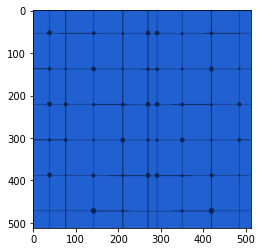

1


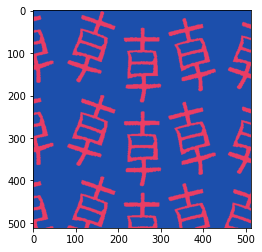

2


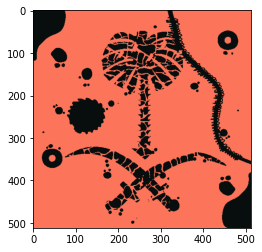

3


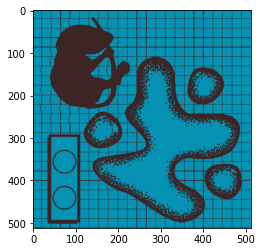

4


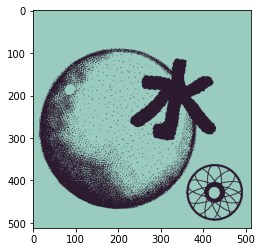

5


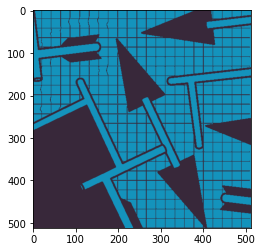

6


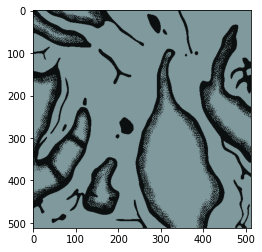

7


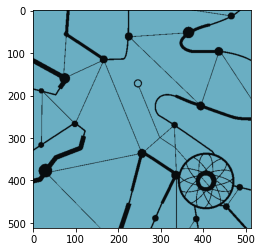

8


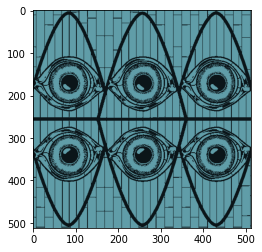

9


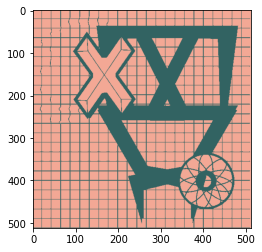

10


In [66]:
for i in range(len(c)):
  try:
    print(i)
    img = Image.fromarray((np.array(c[i], dtype=np.float32) * 255).astype(np.uint8))
    plt.imshow(img)
    plt.show()
    # img.save('/content/drive/My Drive/FinalTestCycleGAN/Segments/Segment_{:04d}.png'.format(i))
  except:
    continue
